In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, plot_confusion_matrix

%matplotlib inline

In [86]:
df = pd.read_csv('../../../data/moviereviews.tsv', sep='\t')

In [87]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [88]:
len(df)

2000

In [89]:
df.isna().sum()

label      0
review    35
dtype: int64

In [90]:
df.dropna(inplace=True)

In [91]:
df.isna().sum()

label     0
review    0
dtype: int64

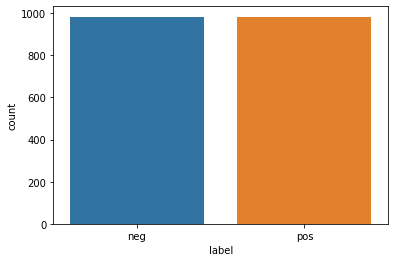

In [92]:
sns.countplot(x=df['label']);

In [93]:
blank_ids = []
for idx, label, rv in df.itertuples():
    if type(rv) == str:
        if rv.isspace():
            blank_ids.append(idx)

In [94]:
blank_ids

[57,
 71,
 147,
 151,
 283,
 307,
 313,
 323,
 343,
 351,
 427,
 501,
 633,
 675,
 815,
 851,
 977,
 1079,
 1299,
 1455,
 1493,
 1525,
 1531,
 1763,
 1851,
 1905,
 1993]

In [95]:
df.drop(blank_ids, inplace=True)

In [96]:
len(df)

1938

In [97]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [98]:
X = df['review']
y = df['label']

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [100]:
log_pipe = Pipeline(steps=[
    ('tfidf', TfidfVectorizer()),
    ('logreg', LogisticRegression())
])

In [101]:
def fit_eval(pipe, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(pipe, X_test, y_test, cmap='Reds');

              precision    recall  f1-score   support

         neg       0.81      0.83      0.82       308
         pos       0.84      0.82      0.83       332

    accuracy                           0.82       640
   macro avg       0.82      0.83      0.82       640
weighted avg       0.83      0.82      0.83       640



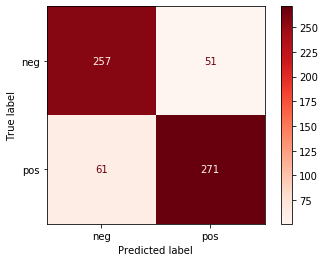

In [102]:
fit_eval(log_pipe, X_train, y_train, X_test, y_test)

In [103]:
svc_pipe = Pipeline(steps=[
    ('tfidf', TfidfVectorizer()),
    ('svc', LinearSVC())
])

              precision    recall  f1-score   support

         neg       0.84      0.84      0.84       308
         pos       0.85      0.85      0.85       332

    accuracy                           0.85       640
   macro avg       0.85      0.85      0.85       640
weighted avg       0.85      0.85      0.85       640



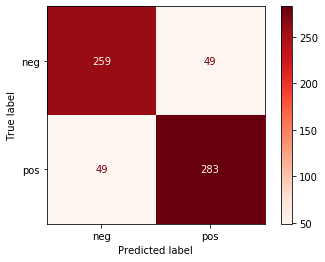

In [104]:
fit_eval(svc_pipe)

### With stopwords

In [105]:
stopwords = ['a', 'about', 'an', 'and', 'are', 'as', 'at', 'be', 'been', 'but', 'by', 'can', \
             'even', 'ever', 'for', 'from', 'get', 'had', 'has', 'have', 'he', 'her', 'hers', 'his', \
             'how', 'i', 'if', 'in', 'into', 'is', 'it', 'its', 'just', 'me', 'my', 'of', 'on', 'or', \
             'see', 'seen', 'she', 'so', 'than', 'that', 'the', 'their', 'there', 'they', 'this', \
             'to', 'was', 'we', 'were', 'what', 'when', 'which', 'who', 'will', 'with', 'you']

In [106]:
svc_pipe2 = Pipeline(steps=[
    ('tfidf', TfidfVectorizer(stop_words=stopwords)),
    ('svc', LinearSVC())
])

              precision    recall  f1-score   support

         neg       0.84      0.83      0.84       308
         pos       0.85      0.86      0.85       332

    accuracy                           0.84       640
   macro avg       0.84      0.84      0.84       640
weighted avg       0.84      0.84      0.84       640



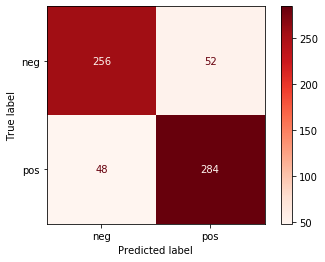

In [107]:
fit_eval(svc_pipe2)